# Final project-Fashion Mnist

# Load the data from Kaggle
First download the data file in `.npz` format (native Numpy format) from [Kaggle competition website](https://www.kaggle.com/c/uci-math10-spring2019), put them in the same folder with this notebook. The following cell will load the file as numpy arrays.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

Using TensorFlow backend.


In [2]:
# Load the data
X_train = np.load('fmnist-train-imgs.npz')['X'] # the images for training
y_train = np.load('fmnist-train-labels.npz')['y'] # the labels (category) for images 

# the images for competition (you want to use your model to predict the labels)
X_test = np.load('fmnist-test-imgs.npz')['X'] 

# Visualize samples
Notice `X_train` and `X_test` are numpy arrays with dimensions `(42000, 784)` and `(28000, 784)`, so that `X_train[i,:]` and `X_test[i,:]` represent images for training and prediction, respectively. We can plot first 20 samples from the `X_train` (by reshaping each row into a 28x28 grayscale image), and we make the title as their label (which category they belong) as follows: for example, in the plotted images, the first image in the first row is of category 9.

Reference:

| ID | Category |
|---|-------|
| 0 | T-shirt/top      |
| 1 | Trouser |
| 2 | Pullover      |
| 3 |   Dress    |
| 4 |   Coat    |
| 5 |  Sandal     |
| 6 |  Shirt     |
| 7 |  Sneaker     |
| 8 |  Bag     |
| 9 |  Ankle boot     |

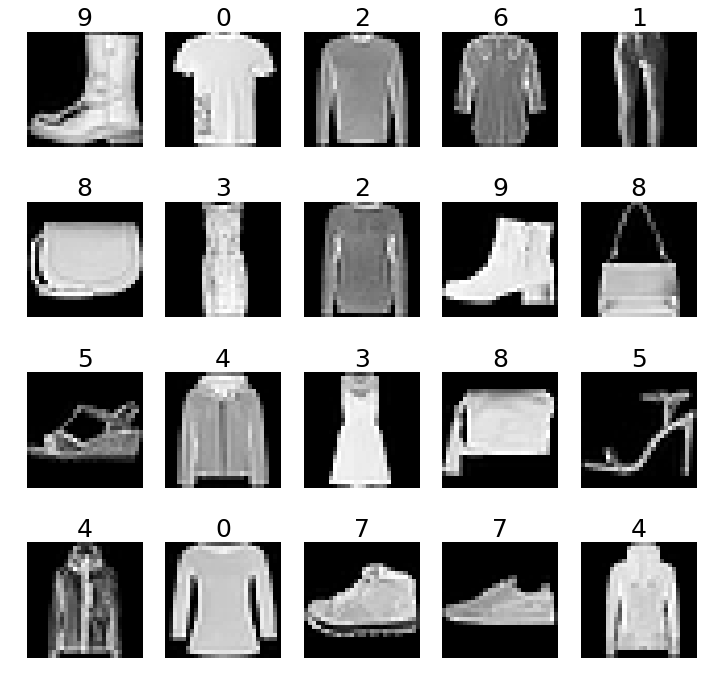

In [3]:
fig, axes = plt.subplots(4,5, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(20):
    axes[i].axis('off') # hide the axes ticks
    axes[i].imshow(X_train[i,:].reshape(28,28), cmap = 'gray')
    axes[i].set_title(str(y_train[i]), color= 'black', fontsize=25)
plt.show()

# Prepare the data

For any Kaggle competition, you do not have access to `y_test`. To cross-validate your model, you need split the training samples to two sets as follows. One is training dataset, the other is your cross-validation dataset, so that you have access to the `y`-label of this set. Use the CV dataset to make sure that your model is not overfitting or underfitting.

In [4]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.4, random_state = 0)

In [5]:
X_train.shape # this should be (42000,784)

(42000, 784)

In [6]:
y_train.shape # label of X_train

(42000,)

In [7]:
X_test.shape # this should be (28000,784)

(28000, 784)

In [8]:
X_train1=X_train1.reshape(X_train1.shape[0],28,28,1)
X_test1=X_test1.reshape(X_test1.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [9]:
X_train1=X_train1.astype('float32')
X_test1=X_test1.astype('float32')
X_test=X_test.astype('float32')

In [10]:
X_train1/=255
X_test1/=255
X_test/=255

# Model(s), algorithm(s), and CV
In Kaggle competition's leaderboard, there is a benchmark entry with about 90% accuracy using K-nearest neighbors (KNN). You should choose model(s) we have learned in class, and in general, the model of your choice should exceed the benchmark's performance.

In [13]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train1,y_train1, epochs=10)

Epoch 1/10
25200/25200 [==============================] - 7s 291us/step - loss: 0.5083 - acc: 0.8175
Epoch 2/10
25200/25200 [==============================] - 7s 286us/step - loss: 0.3344 - acc: 0.8799
Epoch 3/10
25200/25200 [==============================] - 7s 285us/step - loss: 0.2778 - acc: 0.8986
Epoch 4/10
25200/25200 [==============================] - 7s 288us/step - loss: 0.2386 - acc: 0.9116
Epoch 5/10
25200/25200 [==============================] - 7s 289us/step - loss: 0.2081 - acc: 0.9241
Epoch 6/10
25200/25200 [==============================] - 7s 292us/step - loss: 0.1827 - acc: 0.9336
Epoch 7/10
25200/25200 [==============================] - 7s 290us/step - loss: 0.1584 - acc: 0.9435
Epoch 8/10
25200/25200 [==============================] - 7s 292us/step - loss: 0.1389 - acc: 0.9481
Epoch 9/10
25200/25200 [==============================] - 8s 309us/step - loss: 0.1223 - acc: 0.9539
Epoch 10/10
25200/25200 [==============================] - 8s 305us/step - loss: 0.1108 - a

In [15]:
y_pred=np.argmax(model.predict(X_test1),axis=1)
acc = np.sum(y_pred==y_test1)/len(y_test1)
print(acc)

0.9052976190476191


In [16]:
y_pred_train=np.argmax(model.predict(X_train1),axis=1)
acc = np.sum(y_pred_train==y_train1)/len(y_train1)
print(acc)

0.9781746031746031


# Prediction using your trained model
After your model has been trained using all or selected samples from `X_train` and `y_train`. You should obtain a solution of the prediction of the labels by your model using the testing data `X_test`, for example, scikit learn's KNN object's [`predict` function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict).

In [17]:
## your code here to test X_test to get y_pred ###
y_pred=np.argmax(model.predict(X_test),axis=1)

# Export your solutions and upload to Kaggle
The result predicted by your model can be named to `y_pred`, and be exported to a `.csv` file using the `np.savetxt()` function provided in the cell below. Your `y_pred` should be of a dimension `(28000,)` numpy array. Rename the resulting `solutions-yournames.csv` by replacing `yournames` by your team members' initials connected by hyphen and then upload to Kaggle.

In [18]:
solutions = np.zeros((28000, 2))
solutions[:,0] = np.arange(1,28001)
solutions[:,1] = y_pred
solutions = solutions.astype(int)
np.savetxt("solutions-SY-JZ-WZ-CNN(dense=15,epoch=15).csv", solutions, 
           fmt='%s', header = 'Id,Category', delimiter = ',', comments='')

# Test the submission using a random entry
You have to make sure your submission is in the correct format, and you can use the following randomly generated solution to make sure it works. If you upload `solutions-random.csv` to Kaggle, your score should be around 10%.

In [15]:
# y_random = np.random.randint(low=0, high=9, size=28000)
# solutions_random = np.zeros((28000, 2))
# solutions_random[:,0] = np.arange(1,28001)
# solutions_random[:,1] = y_random
# solutions_random = solutions_random.astype(int)
# np.savetxt("solutions-random.csv", solutions_random, 
#            fmt='%s', header = 'Id,Category', delimiter=',', comments='')